# DATS 6103 - Individual Project 3 - Sabina Azim:

# Analysis of the Snapchat Political Ads Library

## Project Purpose

I will be looking at the Snapchat Political Ads Library which Snapchat has made publicly available since 2018.I will specifically be looking at what political organizations use Snapchat the most for advertising, which ads make the most impressions, targeted age/geographic groups, and what kinds of ads were more prevalent in 2020 around election time.

Political ads on social media have always been pretty controversial. Facebook has refused to fact check their political ads and after much hate they finally decided in early November to ban political ads all together. Twitter on the other hand banned political ads pretty early on back in 2019. I thought that taking a look at Snapchat's political ads would be particularly interesting because Snapchat claims to fact check all of their political ads and in the recent election it is said that they were actively going after political advertising rather than stepping away from it like Facebook and Twitter have. 

## Data Source

The data that I will be using comes directly from the Snapchat website: https://www.snap.com/en-US/political-ads/.

**Snapchat regards an ad as 'political' if it is election, advocacy, or issue related.** 

Some information on the column names that will be beneficial to know (see [here](https://github.com/skang06/snapchat_political_ads_2020/blob/master/readme.txt) for full list):

*Currency Code* - local currency used to pay for advertisement  
*Spend* - amount (in local currency) spent on advertisement    
*Impressions* - number of times the ad has been viewed   
*Organization Name* - organization responsible for creating the Ad     
*CandidateBallotInformation* - candidate/ ballot initiative associated with the Ad   
*PayingAdvertiserName* - entity providing the funds for the Ad  
*GenderCode* - targeted gender  
*AgeBracket* - target age group  
*Interests* - interests of targeted audience   
*Advanced Demographics* - 3rd party data segments targeting criteria used in Ad   

*Note: You'll notice that for my analysis, I'm mainly focusing on the Paying Advertiser, rather than the Organization Name because since I will be looking at spending and impressions, it made more sense for me to focus on who was actually spending the money on these ads.*

## Additional Resources

I was not familiar with some of these political organizations so I used several resources to learn a bit more about their affiliations and what they stand for. If you want to learn more about these organizations, here are the resources I used:

https://www.pacronym.org/ - remove Trump from office campaign   
https://www.anotheracronym.org/about/ - movement for the progressive movement     
https://truthinitiative.org/who-we-are - anti-tobacco campaign   
https://collectivepac.org/about/ - elect more people from the Black Community to seats of power      
https://www.benjerry.com/values/issues-we-care-about/get-the-dough-out-of-politics/ - I was surprised to see Ben & Jerry's appear so often in my analysis because I didn't realize they had any sort of political campaigns - take a deeper look here 

I also used [statista](https://www.statista.com/topics/2882/snapchat/) to get some general Snapchat insights - countries with most users, age group wiht highest users, etc.

## Importing and Cleaning Data

In [1]:
#importing the libraries I will be needing throughout this project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#signing into my plotly account
py.sign_in('sazim89', 'BlwOe57umOuHjYskua3a')

In [3]:
#reading in the data sets using read_csv since they are all csv files
ads_2018 = pd.read_csv('PoliticalAds2018.csv')
ads_2019 = pd.read_csv('PoliticalAds2019.csv')
ads_2020 = pd.read_csv('PoliticalAds2020.csv')

In [4]:
#adding year as a column so when I append the dataframes together the year the data is from is apparant 
ads_2018['Year'] = '2018'
ads_2019['Year'] = '2019'
ads_2020['Year'] = '2020'

### Appending the datasets together to create just one dataset i'll have to work with

In [5]:
#creating one large dataset with all of the data using append, replacing all of the Nan values with N/A 
library = ads_2018.append([ads_2019, ads_2020])
pd.options.display.max_columns = None
library.head()

ADID  \
0  151fe09cfa3ca90f2ee4dd3ba8641235413c033fb3c953...   
1  d00738f8f6b60aad104e21fba9da1915e3272b76b2f62f...   
2  5e1f8c6d3a2dd4832d15cebcf03f38298fbf531b32fc8f...   
3  dfaf97944042e8febad67ab5f1a8a14248a1eddeba1280...   
4  47b0608ccbfd95b36c44821222681062143f52a8bedf58...   

                                         CreativeUrl Currency Code  Spend  \
0  https://www.snap.com/political-ads/asset/5accf...           EUR    219   
1  https://www.snap.com/political-ads/asset/da731...           CAD    679   
2  https://www.snap.com/political-ads/asset/75251...           USD    207   
3  https://www.snap.com/political-ads/asset/b12aa...           USD   4749   
4  https://www.snap.com/political-ads/asset/a0b92...           GBP   4672   

   Impressions             StartDate               EndDate  \
0       108884  2018/09/30 10:24:48Z  2018/10/14 10:24:55Z   
1       339986  2018/12/07 10:56:48Z                   NaN   
2        27035  2018/10/30 17:58:01Z  2018/11/06 22:59:59Z   
3      1255809  2018/10/29 23:46:27Z  2018/11/03 06:00:00Z   
4      7350690  2018/10/04 11:42:14Z  2018/11/01 11:42:14Z   

                 OrganizationName  \
0                     Media Agent   
1  First Nations Health Authority   
2           Mothership Strategies   
3                         ACRONYM   
4          Republic of Media Ltd.   

                                      BillingAddress  \
0                     Østre alle 2 ,Værløse ,3500,DK   
1      501-100 Park Royal South,Vancouver,V7T 1A2,CA   
2  1328 Florida Avenue NW, Building C, Washington...   
3                                                 US   
4         4th Floor, Nova House,Edinburgh,EH3 9QQ,GB   

  CandidateBallotInformation            PayingAdvertiserName Gender  \
0                        NaN                Dansk_Folkeparti    NaN   
1                        NaN  First Nations Health Authority    NaN   
2                        NaN     Progressive Turnout Project    NaN   
3                        NaN                 Show Up To Vote    NaN   
4                        NaN             Scottish Government    NaN   

  AgeBracket     CountryCode Regions (Included) Regions (Excluded)  \
0        NaN         denmark                NaN                NaN   
1        34-          canada                NaN                NaN   
2        18+   united states                NaN                NaN   
3        18+   united states            Florida                NaN   
4        NaN  united kingdom                NaN                NaN   

  Electoral Districts (Included)  Electoral Districts (Excluded)  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

                         Radius Targeting (Included)  \
0                                                NaN   
1  latitude 49.70039;longitude -124.98208;radius ...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

  Radius Targeting (Excluded) Metros (Included) Metros (Excluded)  \
0                         NaN               NaN               NaN   
1                         NaN               NaN               NaN   
2                         NaN               NaN               NaN   
3                         NaN               NaN               NaN   
4                         NaN               NaN               NaN   

  Postal Codes (Included) Postal Codes (Excluded)  \
0                     NaN                     NaN   
1                     NaN                     NaN   
2                     NaN                     NaN   
3                     NaN                     NaN   
4                     NaN                

In [6]:
#seeing the number of columns and rows - the dataframe ends up being over 500,000 data points
library.shape

(15713, 35)

In [7]:
#looking at all of the columns 
library.columns.values

array(['ADID', 'CreativeUrl', 'Currency Code', 'Spend', 'Impressions',
       'StartDate', 'EndDate', 'OrganizationName', 'BillingAddress',
       'CandidateBallotInformation', 'PayingAdvertiserName', 'Gender',
       'AgeBracket', 'CountryCode', 'Regions (Included)',
       'Regions (Excluded)', 'Electoral Districts (Included)',
       'Electoral Districts (Excluded)', 'Radius Targeting (Included)',
       'Radius Targeting (Excluded)', 'Metros (Included)',
       'Metros (Excluded)', 'Postal Codes (Included)',
       'Postal Codes (Excluded)', 'Location Categories (Included)',
       'Location Categories (Excluded)', 'Interests', 'OsType',
       'Segments', 'Language', 'AdvancedDemographics',
       'Targeting Connection Type', 'Targeting Carrier (ISP)',
       'CreativeProperties', 'Year'], dtype=object)

### Dropping columns I won't be using

In [8]:
#using the drop() method to get rid of columns I know I won't be using 
library = library.drop(['ADID', 'CreativeUrl', 'BillingAddress','Regions (Included)',
       'Regions (Excluded)', 'Electoral Districts (Included)',
       'Electoral Districts (Excluded)', 'Radius Targeting (Included)',
       'Radius Targeting (Excluded)', 'Metros (Included)',
       'Metros (Excluded)', 'Postal Codes (Included)',
       'Postal Codes (Excluded)', 'Location Categories (Included)',
       'Location Categories (Excluded)', 'OsType','Segments', 'Language', 
       'Targeting Connection Type', 'Targeting Carrier (ISP)',
       'CreativeProperties'], axis=1)

### Dealing with the date columns

In [9]:
#getting rid of the time in the data columns so that all that is there is the date in the format YYYY/MM/DD
library['StartDate'] = library['StartDate'].map(lambda x: str(x)[:-10])
library['EndDate'] = library['EndDate'].map(lambda x: str(x)[:-10])

In [10]:
#changing the start date and end date values to datetime type so that I can subtract them from eachother to get
#the number of days in between which gives me how many days the ad ran for
library['StartDate']=pd.to_datetime(library['StartDate'])
library['EndDate']=pd.to_datetime(library['EndDate'])
library['Ad Length'] = library['EndDate'] - library['StartDate']

In [11]:
#making the values from subtracting start date from end date into its own column called ad length 
library['Ad Length'] = library['Ad Length'].dt.days

### Preview of Final Data Frame

In [12]:
#preview of what the final data frame looks like 
library.head()

Currency Code  Spend  Impressions  StartDate    EndDate  \
0           EUR    219       108884 2018-09-30 2018-10-14   
1           CAD    679       339986 2018-12-07        NaT   
2           USD    207        27035 2018-10-30 2018-11-06   
3           USD   4749      1255809 2018-10-29 2018-11-03   
4           GBP   4672      7350690 2018-10-04 2018-11-01   

                 OrganizationName CandidateBallotInformation  \
0                     Media Agent                        NaN   
1  First Nations Health Authority                        NaN   
2           Mothership Strategies                        NaN   
3                         ACRONYM                        NaN   
4          Republic of Media Ltd.                        NaN   

             PayingAdvertiserName Gender AgeBracket     CountryCode Interests  \
0                Dansk_Folkeparti    NaN        NaN         denmark       NaN   
1  First Nations Health Authority    NaN        34-          canada       NaN   
2     Progressive Turnout Project    NaN        18+   united states       NaN   
3                 Show Up To Vote    NaN        18+   united states       NaN   
4             Scottish Government    NaN        NaN  united kingdom       NaN   

  AdvancedDemographics  Year  Ad Length  
0                  NaN  2018       14.0  
1                  NaN  2018        NaN  
2                  NaN  2018        7.0  
3                  NaN  2018        5.0  
4                  NaN  2018       28.0

This is all I'm going to do for now to clean my data - I will create smaller dataframes and drop null values where necessary as I do my analysis.

## Let's getting started on the analysis by looking at what types of people these ads typically target...

### Countries Targeted the Most Often by Snapchat Political Ads

In [13]:
country = library.loc[:,'CountryCode'].value_counts()#getting the number of ads targeting each country 
df_country = pd.DataFrame(data=country).reset_index() #resetting the index
df_country.rename(columns={'index':'Country', 'CountryCode':'Total Ads'}, inplace=True) #renaming the columns
top10_country = df_country.head(10) #looking at just the top 10

#Using a bar chart to display the countries targeted the most by Snapchat Ads 
fig = px.bar(top10_country, x='Country', y='Total Ads', 
             title='Top 10 Countries Targeted by Snapchat Political Ads', width = 900, 
            height = 500)
fig.update_traces(marker_color='rosybrown', marker=dict(line=dict(color='#000000', width=1))) #adding black border  
fig.show()

Snapchat political ads target those in the US the most by far. This was no surprise to me because the US has the most users of Snapchat than anywhere else in the world with over 90 million users as of October of 2020. 

### Interests and Advanced Demographics

In [14]:
#using .loc to isolate the interests column and dropping the null values because if I don't do this, I will not 
#be able to convert this column to a list 
interests = library.loc[:,['Interests']]
interests.dropna(inplace=True)
interest_list = interests['Interests'].tolist() #converting column to a list to use in the word cloud 

#doing the same thing again for the AdvancedDemographics column 
demographics=library.loc[:,['AdvancedDemographics']]
demographics.dropna(inplace=True)
demographics_list = demographics['AdvancedDemographics'].tolist()

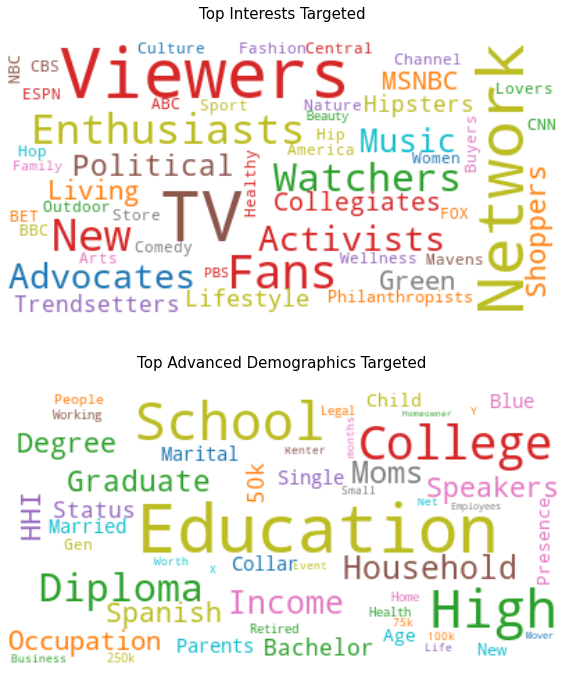

In [15]:
#importing wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(8,10))

plt.subplot(211) #setting subplot dimensions

#wordcloud settings - font, number of words, colors, setting values to list from above 
wordcloud = WordCloud(max_font_size=50, max_words=50, collocations=False, colormap="tab10",
                      background_color="white").generate(' '.join(interest_list)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.title('Top Interests Targeted \n', fontsize=15)
plt.axis("off")

#repeating the same thing again for the advanced demographics word cloud 
plt.subplot(212)
wordcloud = WordCloud(max_font_size=50, max_words=50, collocations=False, colormap="tab10",
                      background_color="white").generate(' '.join(demographics_list)) #settings for wordcloud 
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top Advanced Demographics Targeted \n', fontsize=15)
plt.axis("off")

plt.tight_layout()
plt.show()

I thought it would be interesting to look at what types of people these advertisements try and target the most. The dataset gave information on the interests and advanced demographics of the targeted audience and I used these to make a word cloud of the most common interests and demographics.  

The words that stick out the most when it comes to interests seem to be viewers, activists, advocates, political, TV, collegiates, hipsters, various news networks, etc. It seems like most of these ads are trying to reach people who tend to know and care about what's going on in the world, which makes sense because these types of people would be the most likely to actually engage with political advertisements. 

When looking at the advanced demographics, what stuck out to me the most is really education and all sorts of words relating to education - college, highschool, diploma, bachelor, etc. You can tell they're really aiming to get through to the more educated population, probably because these are the people who might understand the initiatives better and overall just be more interested. 

### Age Groups Targeted the Most

In [16]:
#The dataset gives an age bracket but I wanted to look at this in terms of minimum and maximum ages so I split
#the AgeBracket column calues using str.split and I set the split character as '-' to get two seperate ages. 
#I then set these ages to two columns - min and max age 
age = library.loc[:,'AgeBracket']
age_df = pd.DataFrame(data=age).reset_index()
age_df[['Min Age', 'Max Age']] = age_df.AgeBracket.str.split("-",expand=True)

#Counting up the totals of each age in the minimum age column
min_age = age_df['Min Age'].value_counts()
min_age_df = pd.DataFrame(data=min_age).reset_index()
min_age_df.rename(columns={'index':'Age', 'Min Age':'Count'}, 
                        inplace=True)

#Counting up the totals of each age in the maximum age column
max_age = age_df['Max Age'].value_counts()
max_age_df = pd.DataFrame(data=max_age).reset_index()
max_age_df.rename(columns={'index':'Age', 'Max Age':'Count'}, 
                        inplace=True)

#I realized there were a lot of ages that were Age+ values for example 18+ so I decided to isolate these also so
#I could display these seperately - I used str.contains to pull out values that contain a + sign 
age_plus = min_age_df[min_age_df.Age.str.contains(r'[+]')]
top_age_plus = age_plus.head()
min_age_final = min_age_df.drop(min_age_df[min_age_df.Age.str.contains(r'[+]')].index)
top_min_age = min_age_final.head()
max_age_df.loc[3:3,'Age'] = 'Not Mentioned' 
top_max_age = max_age_df.head()

In [17]:
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]] #setting the specs for the subplots 
#importing making_subplots 
from plotly.subplots import make_subplots
#adding traces for the subplots - each one is going to be a donut pie chart so layout is the same 
fig = make_subplots(rows=1, cols=3, specs=specs, subplot_titles = ('Age+', 'Min Age', 'Max Age'))
fig.add_trace(go.Pie(labels= top_age_plus['Age'], values=top_age_plus['Count'], name='Age+'),1, 1)
fig.add_trace(go.Pie(labels= top_min_age['Age'], values=top_min_age['Count'], name='Min Age'),1, 2)
fig.add_trace(go.Pie(labels= top_max_age['Age'], values=top_max_age['Count'], name='Max Age'),1, 3)
fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent', rotation = 180,hole=.6,
                  marker=dict(line=dict(color='#000000', width=1))) #setting markers, rotation, size of donut hole
fig.update_layout(title_text = 'Top Ages Targeted', showlegend=False)
fig.show()

An overwhelming amount of ads target 18+ year olds or an age bracket where the minimum age is 18. The maximum age targeted the most is 34. This isn't too surprising considering the ages that use Snapchat the most in general are 15-25 year olds and 26-35 year olds. By September of 2020, 48% of snapchat users were 15-25 and 30% were 26-35. This really shows how these advertisers are utilizing Snapchat to reach this large young adult audience that Snapchat has to offer. 

### Gender Breakdown

In [18]:
#changing null values to All Genders in the dataframe - if you go to the github page where the columns are 
#explained, it is stated that when the gender is NA, it means it is targeted at all genders 
library['Gender'] = library['Gender'].fillna('All Genders')
gender = library.loc[:,'Gender'].value_counts() #counting up totals for each gender
gender_df = pd.DataFrame(data=gender).reset_index() #resetting index 
gender_df.rename(columns={'index':'Gender', 'Gender':'Total Ads Targeted'}, inplace=True) #changing column names

#creating pie chart - giving the values, labels, colors, title
fig = px.pie(gender_df, values='Total Ads Targeted', names='Gender', title='Breakdown of Targeted Genders',
            labels='Gender', height = 500, width=700, color='Gender',
             color_discrete_map = {'FEMALE':'pink', 'MALE':'lightblue', 'All Genders':'wheat'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=1))) #setting markers (border)  
fig.show()

## Top 10 Political Advertisers using Snapchat

In [19]:
#Creating a dataframe containing the number of ads each Advertiser has run 
advertiser = library.groupby(['PayingAdvertiserName', 'Year']).size()
advertiser_count = pd.DataFrame(data=advertiser).reset_index()
advertiser_count.rename(columns={0:'Total'}, inplace=True)

In [20]:
#Breaking down the dataframe I created above by year 
#I only want to look at the top 10 advertisers by year so I'm sorting the values and using .head to get just those
Year_2018 = advertiser_count.loc[advertiser_count['Year'] == '2018']
Year_2018.sort_values(by='Total', ascending=False, inplace=True)
top10_2018 = Year_2018.head(10)
Year_2019 = advertiser_count.loc[advertiser_count['Year'] == '2019']
Year_2019.sort_values(by='Total', ascending=False, inplace=True)
top10_2019 = Year_2019.head(10)
Year_2020 = advertiser_count.loc[advertiser_count['Year'] == '2020']
Year_2020.sort_values(by='Total', ascending=False, inplace=True)
top10_2020 = Year_2020.head(10)

In [21]:
fig = make_subplots(rows=2, cols=2,vertical_spacing = 0.25) #set number of rows and columns and spacing 
fig.add_trace(go.Bar(x=top10_2018['PayingAdvertiserName'], y=top10_2018['Total'], name="2018",
             marker_color = 'darkkhaki'),1, 1) #bar chart layout will be the same for each trace
fig.add_trace(go.Bar(x=top10_2019['PayingAdvertiserName'], y=top10_2019['Total'], name="2019",
             marker_color = 'indianred'),1, 2)
fig.add_trace(go.Bar(x=top10_2020['PayingAdvertiserName'], y=top10_2020['Total'], name="2020",
             marker_color = 'skyblue'),2, 1)
fig.update_layout(title_text= 'Advertisers Running the Most Ads', height=700)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1))) #adding a border around the bars 
fig.update_yaxes(title_text="Total Ads", row=1, col=1) #adding y-axis
fig.update_yaxes(title_text="Totals Ads", row=2, col=1) 
fig.show()

Looking at the top 10 advertisers by year, you see that in 2018 and 2019 there really aren't many specific Political Party affiliated advertisers. There's a lot of just overall voter participation organizatoins like Voter Participation Center, Our Lives Our Vote, Vote For Your Future, etc. - so basically a lot of advertisers that are trying to raise voter turnout. 

Come 2020 - we see more Party specific advertisements - Biden for President, the DNC, PACRONYM (organization to get Trump out of Office), Donald J. Trump for President, etc. - a lot more advertisements are for specific candidates or Parties. 

## Candidate Ballot Information

In [22]:
#creating df with just the candidate ballot information and finding the totals for each candidate/initiative 
ballot = library.loc[:,'CandidateBallotInformation'].value_counts()
ballot_info = pd.DataFrame(data=ballot).reset_index()
ballot_info.rename(columns={'index':'Candidate Ballot Info', 'CandidateBallotInformation':'Count'}, 
                        inplace=True)
top10_ballot = ballot_info.head(10)

#showing the party the candidate/initiative is affiliated with (if any) - blue is democrat, red is republican
colors = ['rosybrown'] * 10
colors[0] = 'blue'
colors[1]= 'blue'
colors[3] = 'blue'
colors[5] = 'red'
colors[9] = 'blue'
#creating a bubble chart - the bigger the bubble, the more ads for that candidate/initiative 
fig = px.scatter(top10_ballot, x='Candidate Ballot Info', y="Count",width=900, height=500, size='Count',
                 title = "Top 10 Candidates/Ballot Initiatives to Appear on Advertisements")
fig.update_traces(marker_color=colors, marker=dict(line=dict(color='#000000', width=1)))
fig.show()

Five out of the 10 top candidate/ballot initiative are party affiliated, but only one of those is for the Republican Party which was the Donald J Trump for President Initiative. I found this very interesting because just by looking at these top 10, you can see that the Democratic Party ran over 5x the amount of ads that the Repbulican Party ran across 2018-2020.

## Ad Length 

### How long are Ads typically running for?

In [23]:
#using the ad length column I added into the dataframe to see how long ads typically run for 
length = library.loc[:,'Ad Length'].value_counts()
length_df = pd.DataFrame(data=length).reset_index()
length_df.rename(columns={'index':'Ad Length (Days)', 'Ad Length':'# of Ads'}, 
                        inplace=True)
length_top = length_df.head(50) #I decided to just look at the 50 most common run times in days 
#creating a bubble chart again - size is the # of ads 
fig = px.scatter(length_top, x='Ad Length (Days)', y='# of Ads', size='# of Ads',
           title = 'Most Common Ad Run Time (Days)', width=900, height=500) 
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

### Relationship between Ad Length and Impressions

In [24]:
#bubble chart again showing the relationship between impressions and ad length 
fig = px.scatter(library, x="Ad Length", y="Impressions", size='Impressions', 
                 hover_name="PayingAdvertiserName", log_x=True,size_max=60, #size of largest bubble 
                 title = 'Ad Length (Days) vs Impressions', width=900, height=500)
fig.show()

There's really no clear relationship between the ad length and number of impressions. It definitely seems like the ads with short run times don't have as many impressions, but at the same time there are plenty of ads that run for 50-100 days that have the same amount of impressons as ads that run for 5-10 days. 

## Spending and Impressions

### Total Spending by Currency Across 2018-2020

In [25]:
#dropping null values and using the sum method to get the sum of spending by year (using groupby)
total_spend = library.dropna(subset=['Currency Code','Spend'])
total_spending = total_spend.loc[:,['Currency Code','Spend','Year']].groupby(['Currency Code','Year'])['Spend'].sum()
df_spend = pd.DataFrame(data=total_spending).reset_index()

#splitting the spend_df up into two df - one for USD and one for all other currencies 
usd = df_spend.loc[df_spend['Currency Code'] == 'USD']
other_currency = df_spend.loc[df_spend['Currency Code'] != 'USD']
currency_codes = ['AUD','CAD', 'DKK','EUR', 'GBP','NOK', 'SEK']

#Adding zeros as place holders for currencies with no values for particular years - the graph values will be 
#messed up if I don't do this. I'm also resetting the index after each addition so that the index numbers align
#with the the line I'm inserting 

other_currency.loc[5.5] = 'DKK', '2018', 0
other_currency = other_currency.sort_index().reset_index(drop=True)
other_currency.loc[6.5] = 'DKK', '2019', 0
other_currency = other_currency.sort_index().reset_index(drop=True)
other_currency.loc[14.5] = 'NOK', '2018', 0
other_currency = other_currency.sort_index().reset_index(drop=True)
other_currency.loc[15.5] = 'NOK', '2019', 0
other_currency = other_currency.sort_index().reset_index(drop=True)
other_currency.loc[17.5] = 'SEK', '2018', 0
other_currency = other_currency.sort_index().reset_index(drop=True)
other_currency.loc[18.5] = 'SEK', '2019', 0
other_currency = other_currency.sort_index().reset_index(drop=True)


In [26]:
fig = make_subplots(rows=1, cols=2, subplot_titles = ('USD Only', 'Other Currencies')) #setting cols, rows, titles
fig.add_trace(go.Scatter(x=usd['Year'], y=usd['Spend'], name="USD", marker_color = 'gold'),
              1, 1)
for currency in currency_codes:  #creating a for loop to plot each currency seperately by year 
    fig.add_trace(go.Scatter(
        x=other_currency['Year'],
        y=other_currency['Spend'].loc[other_currency['Currency Code'] == currency],
        name= currency), 1, 2)
fig.update_layout(title_text= 'Total Spending by Currency', width=1000, height=400, showlegend=True)
fig.update_traces(marker_size=9, marker=dict(line=dict(color='#000000', width=1))) #marker settings 
fig.show()

A majority of spending was in USD so I created seperate graphs so the difference in amounts can clearly be seen. The USD spending was obviously the most in 2020 due to the election and we can see the trend that as the election year got closer, spending increased. When it comes to the other currencies the most spending was actually in 2019 and we see a large drop for the currencies CAD, EUR, and GBP which are the top used currencies after USD. 

### Advertisers with highest spending (USD) across 2018-2020 

In [27]:
#this time using .loc to find PayingAdvertiserName and their spending so we can see the top spenders 
#going onto add up the amount each advertisers has spent using .sum() 
top_spend = library.loc[:,['PayingAdvertiserName', 'Spend', 'Currency Code']]
top_spend = top_spend.loc[top_spend['Currency Code'] == 'USD'].groupby('PayingAdvertiserName').sum()
top_spend.reset_index(inplace=True)
top_spend.sort_values(by='Spend', ascending=False, inplace=True)
top10_spend = top_spend.head(10)

#plotting with a simple bar chart - pretty much same layout as previous bar charts 
fig = px.bar(top10_spend, x='PayingAdvertiserName', y='Spend',
                color_discrete_sequence = ['rosybrown'], title = 'Advertisers with Highest Spending (USD)', 
                width=900, height=500)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1))) #marker settings 
fig.show()

When it comes to the overall advertisers with the highest spending in USD, we see two presidential candidates campaigns - both belonging to the Democratic Party, while the other ones are more initiative based (voter registration, drug use, etc). The Biden for President campaign is the top spender - spending almost 4 million dollars from 2018-2020 on Snapchat advertisements. 

### Total Impressions Across 2018-2020

In [28]:
#adding up impressions by year by using groupby on the year and .sum() to get the total 
total_impress = library.loc[:,['Impressions','Year']].groupby('Year').sum()
total_impress.reset_index(inplace=True)
#grouping by paying advertiser this time and seeing which advertisers had the most impressions across all 3 years 
impressions = library.loc[:,['PayingAdvertiserName', 'Impressions']].groupby('PayingAdvertiserName').sum()
impressions.reset_index(inplace=True)
impressions.sort_values(by='Impressions', ascending=False, inplace=True)
top10_impressions=impressions.head(10) #looking at just the top 10 

In [29]:
#setting a list with the colors 
colors = ['darkkhaki', 'indianred', 'skyblue']

#setting specs for the subplots - notice we have two different graph types so you must note that in the specs
#everything else in the traces has been done previously so refer to previous graphs for graphing specifics 
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]],
                   subplot_titles=('Totals by Year', 'Advertisers with Most Impressions Overall'))
fig.add_trace(go.Pie(labels=total_impress['Year'], values=total_impress['Impressions'], name="Impressions", 
                     hoverinfo="label+percent", textinfo='value+label+percent',
                     marker=dict(colors=colors, line=dict(color='#000000', width=2))), 1, 1)
fig.add_trace(go.Bar(x=top10_impressions['PayingAdvertiserName'], y=top10_impressions['Impressions'],
             name='Impressions', marker_color = 'rosybrown', marker=dict(line=dict(color='#000000', width=1))),1, 2)
fig.update_layout(title_text="Political Ad Impressions", showlegend=False, width = 1000)
fig.show()

We can see a massive increase in 2020 when it comes to overall impressions of ads. When we look at overall impressions across 2018-2020, we see a lot of familiar advertisers from the above overall spending graph. Notice how Biden for President spent over a million dollars more than truth on advertisements, but truth had a significant amount more of impressions. We also see Albbiom Marketing at number 10 when it comes to spending but impressions wise they are 4th place.  I thought it was interesting to see the difference in ranks of these advertisers when it comes to spending vs impressions because the more you spend doesn't necessarily mean your ad is going to reach a larger audience. 

### Relationship Between Spending and Impressions

*Note: Even though the currencies of the spending amounts differ, this will not impact the overall trend when looking at spending and impressions*

In [30]:
#creating another bubble chart to see spending vs impressions 
fig = px.scatter(library, x="Spend", y="Impressions", size='Impressions', color='Year',
                 hover_name="PayingAdvertiserName", log_x=True, size_max=60, #size of largest bubble 
                 color_discrete_map={'2018':'darkkhaki', '2019':'indianred', '2020':'skyblue'})
fig.update_layout(title_text="Spending vs Impressions", height=400, width=900)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1))) #setting marker border 
fig.show()

No surprise here, there's a general trend of higher spending leading to a greater number of impressons. Of course this isn't always the case as we saw in the graph above,  but this is what we see here for the most part. You can also clearly see that spending and impressions overall were much higher in 2019 and 2020. 

## Zooming in on the 2020 Election

Now that we have an overall view of the span of political advertising from 2018-2020 overall, I really wanted to look specifically at advertising for the candidates of the 2020 election. We already clearly saw that Biden utilized Snapchat a lot for his campaign, but I wanted to get into more specifics in terms of spending and  impressions.

In [31]:
#pulling out the rows containing Biden/Trump/Party specific rows and creating new dataframes 
biden = library[library['PayingAdvertiserName'].str.contains("Biden" or "Democratic" or "Harris")]
trump = library[library['PayingAdvertiserName'].str.contains("Trump" or "Republican" or "Pence")]

#adding a column to each dataframe specifying the candidate 
biden['Candidate'] = 'Biden'
trump['Candidate'] = 'Trump'

#appending the two dataframes together 
election2020=biden.append(trump)

In [32]:
#looking at spending and impressions of Biden vs Trump 
fig = px.scatter(election2020, x="Spend", y="Impressions", size='Impressions', color='Candidate',
                 hover_name="PayingAdvertiserName", log_x=True, size_max=60,
                 color_discrete_map={'Biden':'blue', 'Trump':'red'}) #setting the colors according to party 

fig.update_layout(title_text="Biden vs Trump", height=400, width=900)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1))) #setting marker border 
fig.show()

From the last couple graphs we can easily see that Biden utilized Snapchat a lot for his campaign, but I wanted to go into the specifics of it and see his impressions/spending vs the Trump campaign's. Not only did Biden have a lot more ads running for his campaign, but he also spent a lot more on those ads. Besides for the two significant ads that the MAGA Committee ran, Trump typically didn't spend much more than 10k per ad. Biden's campaign on the otherhand has an overwhelming amount of ads which are over 10k, and even some over 100k. I also wanted to note how even for the ads that Biden spent a similar amount as Trump, it seems like Biden's impressions are just generally higher - and this definitely could just be because Biden has more ads running overall so people could just be engaging with them more. 

## Key Findings/Conclusions

**Target Audience**    

I was able to find some key characteristics of the audience political advertisers have been mainly trying to target through their advertisements on Snapchat. If I was to describe a typical Snapchat User that political ads were trying to target I would say the following: 

- Located in the US - any gender 
- Has an interest in politics and generally knows what's going on in the world  - avid news watcher, activist/advocate, obtained/obtaining some sort of higher education 
- Aged 18+, or to be more specific someone within the range of 18-34 

**Top Advertisers**  

When it comes to the top advertisers using Snapchat, it looks like there are a significant amount of voter particiaption campaigns across all years, but come 2020 we see a lot more candidate/party specific advertisements. 

**Trends**

Ads seem to typically run for less than 50 days - although this doesn't have much of an impact on the number of impressions the advertisers receive. On the other hand, spending has much more of an impact on the number of impressions so its no surprise that most of the advertisers that were considered the top spenders across 2018-2020, also accumulated the most impressions (although rankings varied a bit). 

**Other Conclusions**  

The Biden Campaign overall spent a lot on advertising and therefore ended up reaching a lot of Snapchat users. Based on exit poll data from the 2020 election, 65% of voters ages 18-24 voted for Biden. Do I think Snapchat is the only reason for this? Of course not, but I do think the importance of securing the vote of the younger generations really shined through in this election. As of September 2020, 48% of internet users under the age of 25 use Snapchat on a daily basis and I think the fact that Biden took advantage of this platform where there were so many young people was a large competitive advantage for him.  

It was honestly shocking to me how little the amount of ads - especially in 2020 - were for the Trump campaign and it made me wonder if this has anything to do with Snapchat's fact checking policy. Did the Trump campaign try to get more ads up but they just weren't approved? If I was to go further with this project, I would be interested in looking at how Snapchat fact checks their ads and the data for what ads were rejected based on this fact checking process. 

## Future Predictions

With Facebook and Twitter both banning political ads at this point, I believe that Snapchat will continue to grow when it comes to their political ads revenue. Of course I think we'll see a similar trend in the next couple years where the years leading up to the Presidential election are slower when it comes to advertisements and then it picks up the year before and the year of the election - but overall even for the years before the election I think we'll definitely see more advertiements than we saw in 2018 and 2019 when Facebook and Twitter were also running political ads. 

From the 2020 election we also saw how much impact the young voter population has in particular, so advertisers may aim to user social media like Snapchat which was never really seen as a political/news platform to get their messages across - especially since their options are now very limited with the Facebook and Twitter bans. Another great example of using a platform that would never be considered a poltical platform was the Twitch live stream that Rep. Alexandria Ocasio-Cortez did recently playing the game 'Among Us'to encourage early voting/registering to vote. This was the election where we really saw the power of the younger generation and I think political campaigns whether those be for an election or just for advocacy/issue campaigns now are starting to realize that they have to expand their advertising efforts. 

## Publications

[Go to Github](https://github.com/sabinaazim97/Snapchat_Political_Ads_Library)

[Go to Github (io)](https://sabinaazim97.github.io/)

[Go to Zenodo](https://zenodo.org/record/4317669#.X9OmGWdKjPg)